# Imports for plotting

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
%config Completer.use_jedi = False

# Download data

In [3]:
from selectionfunctions.config import config
config['data_dir'] = '/data/asfe2/Projects/testselectionfunctions/'

In [4]:
import selectionfunctions.cog_vi
selectionfunctions.cog_vi.fetch()

Error looking up DOI "None" in the Harvard Dataverse.
{"status":"ERROR","message":"Dataset with Persistent ID doi:None not found."}


HTTPError: 404 Client Error: Not Found for url: https://dataverse.harvard.edu/api/datasets/:persistentId?persistentId=doi:None

# Simple query

In [43]:
import selectionfunctions.cog_vi as CoGVI
import selectionfunctions.cog_ii as CoGII
from selectionfunctions.source import Source

In [44]:
dr3_sf = CoGII.dr3_sf(version='modelAB',crowding=False)

Loading auxilliary data ...
Loading selection function ...
Creating selection function interpolator...
t = 4.278 s
  auxilliary:   4.275 s
          sf:   0.002 s
interpolator:   0.001 s
Loading auxilliary data ...


In [175]:
ast_sf = CoGVI.chisel(map_fname='astrometry_cogvi.h5', nside=32,
                basis_options={'needlet':'chisquare', 'p':1.0, 'wavelet_tol':1e-2},
                spherical_basis_directory='SphericalBasis')

Loading auxilliary data ...
Spherical Basis: wavelet_chisquare_nside32_B2.0_p1.0_tol0.01_j[0,1,2,3,4,5].h5


/home/andy/py36/lib/python3.6/site-packages/selectionfunctions/cog_vi.py:755: RuntimeWarning: overflow encountered in power
  


Spherical basis file loaded
t = 1.826 s
  auxilliary:   0.014 s
          sf:   0.000 s
interpolator:   1.812 s


In [47]:
rvs_sf = CoGVI.chisel(map_fname='rvs_cogvi.h5', nside=32,
                basis_options={'needlet':'chisquare', 'p':1.0, 'wavelet_tol':1e-2},
                spherical_basis_directory='SphericalBasis')

Loading auxilliary data ...
Spherical Basis: wavelet_chisquare_nside32_B2.0_p1.0_tol0.01_j[0,1,2,3,4,5].h5


/home/andy/py36/lib/python3.6/site-packages/selectionfunctions/cog_vi.py:753: RuntimeWarning: overflow encountered in power
  u = l*(l+1) / np.power(self.B,2.0*j)


Spherical basis file loaded
t = 1.703 s
  auxilliary:   0.039 s
          sf:   0.000 s
interpolator:   1.664 s


In [123]:
ruwe_sf = CoGVI.chisel(map_fname='ruwe1p4_mag_cogvi.h5', nside=32,
                basis_options={'needlet':'chisquare', 'p':1.0, 'wavelet_tol':1e-2},
                spherical_basis_directory='SphericalBasis')

Loading auxilliary data ...
Spherical Basis: wavelet_chisquare_nside32_B2.0_p1.0_tol0.01_j[0,1,2,3,4,5].h5


/home/andy/py36/lib/python3.6/site-packages/selectionfunctions/cog_vi.py:757: RuntimeWarning: overflow encountered in power
  


Spherical basis file loaded
t = 1.927 s
  auxilliary:   0.098 s
          sf:   0.000 s
interpolator:   1.829 s


In [180]:
ast_sf.Cbins

array([-100.,  100.])

In [193]:
for g in [13, 20.5]:
    coords = Source('12h30m25.3s', '15d15m58.1s', frame='icrs', photometry={'gaia_g':g, 'gaia_g_gaia_rp':0.5})
    
    print(f'G = {g:.1f}')
    print(f'P(Gaia EDR3) = {dr3_sf(coords)*100:.1f}%')
    print(f'P(astrometry | EDR3) = {ast_sf(coords, grid=True)*100:.1f}% \nP(astrometry) = {dr3_sf(coords)*ast_sf(coords, grid=True)*100:.1f}%')
    print(f'P(RUWE<1.4 | EDR3) = {ruwe_sf(coords, grid=True)*100:.1f}%  \nP(RUWE<1.4) = {dr3_sf(coords)*ruwe_sf(coords, grid=True)*100:.1f}%')
    print(f'P(RVS | EDR3) = {rvs_sf(coords, grid=True)*100:.1f}% \nP(RVS) = {dr3_sf(coords)*rvs_sf(coords, grid=True)*100:.1f}%')

G = 13.0
P(Gaia EDR3) = 100.0%
P(astrometry | EDR3) = 98.8% 
P(astrometry) = 98.8%
P(RUWE<1.4 | EDR3) = 85.8%  
P(RUWE<1.4) = 85.8%
P(RVS | EDR3) = 28.5% 
P(RVS) = 28.5%
G = 20.5
P(Gaia EDR3) = 100.0%
P(astrometry | EDR3) = 92.8% 
P(astrometry) = 92.8%
P(RUWE<1.4 | EDR3) = 53.0%  
P(RUWE<1.4) = 53.0%
P(RVS | EDR3) = 0.0% 
P(RVS) = 0.0%


# Querying arrays of coordinates

In [59]:
l = np.array([0., 90., 180.])
b = np.array([15., 0., -15.])
g = np.array([20.8,21.0,21.2])

coords = Source(l, b, unit='deg', frame='galactic', photometry={'gaia_g':g})

prob_selection = ast_sf(coords)

print(prob_selection)

[0.36988764 0.65309512 0.02221161]


In [60]:
l = np.linspace(0., 180., 12)
b = np.zeros(12)
g = 21.0*np.ones(12)
l.shape = (3, 4)
b.shape = (3, 4)
g.shape = (3, 4)

coords = Source(l, b, unit='deg', frame='galactic', photometry={'gaia_g':g})

prob_selection = ast_sf(coords)

print(prob_selection)

[[0.39582666 0.85886879 0.78195541 0.8663246 ]
 [0.89019357 0.9164489  0.32863064 0.22782598]
 [0.74205183 0.19198644 0.03000408 0.06670299]]


# Maps

In [166]:
import astropy.units as units

l = np.linspace(-180.0, 180.0, 1000)
b = np.linspace(-90.0,90.0, 500)
l, b = np.meshgrid(l, b)

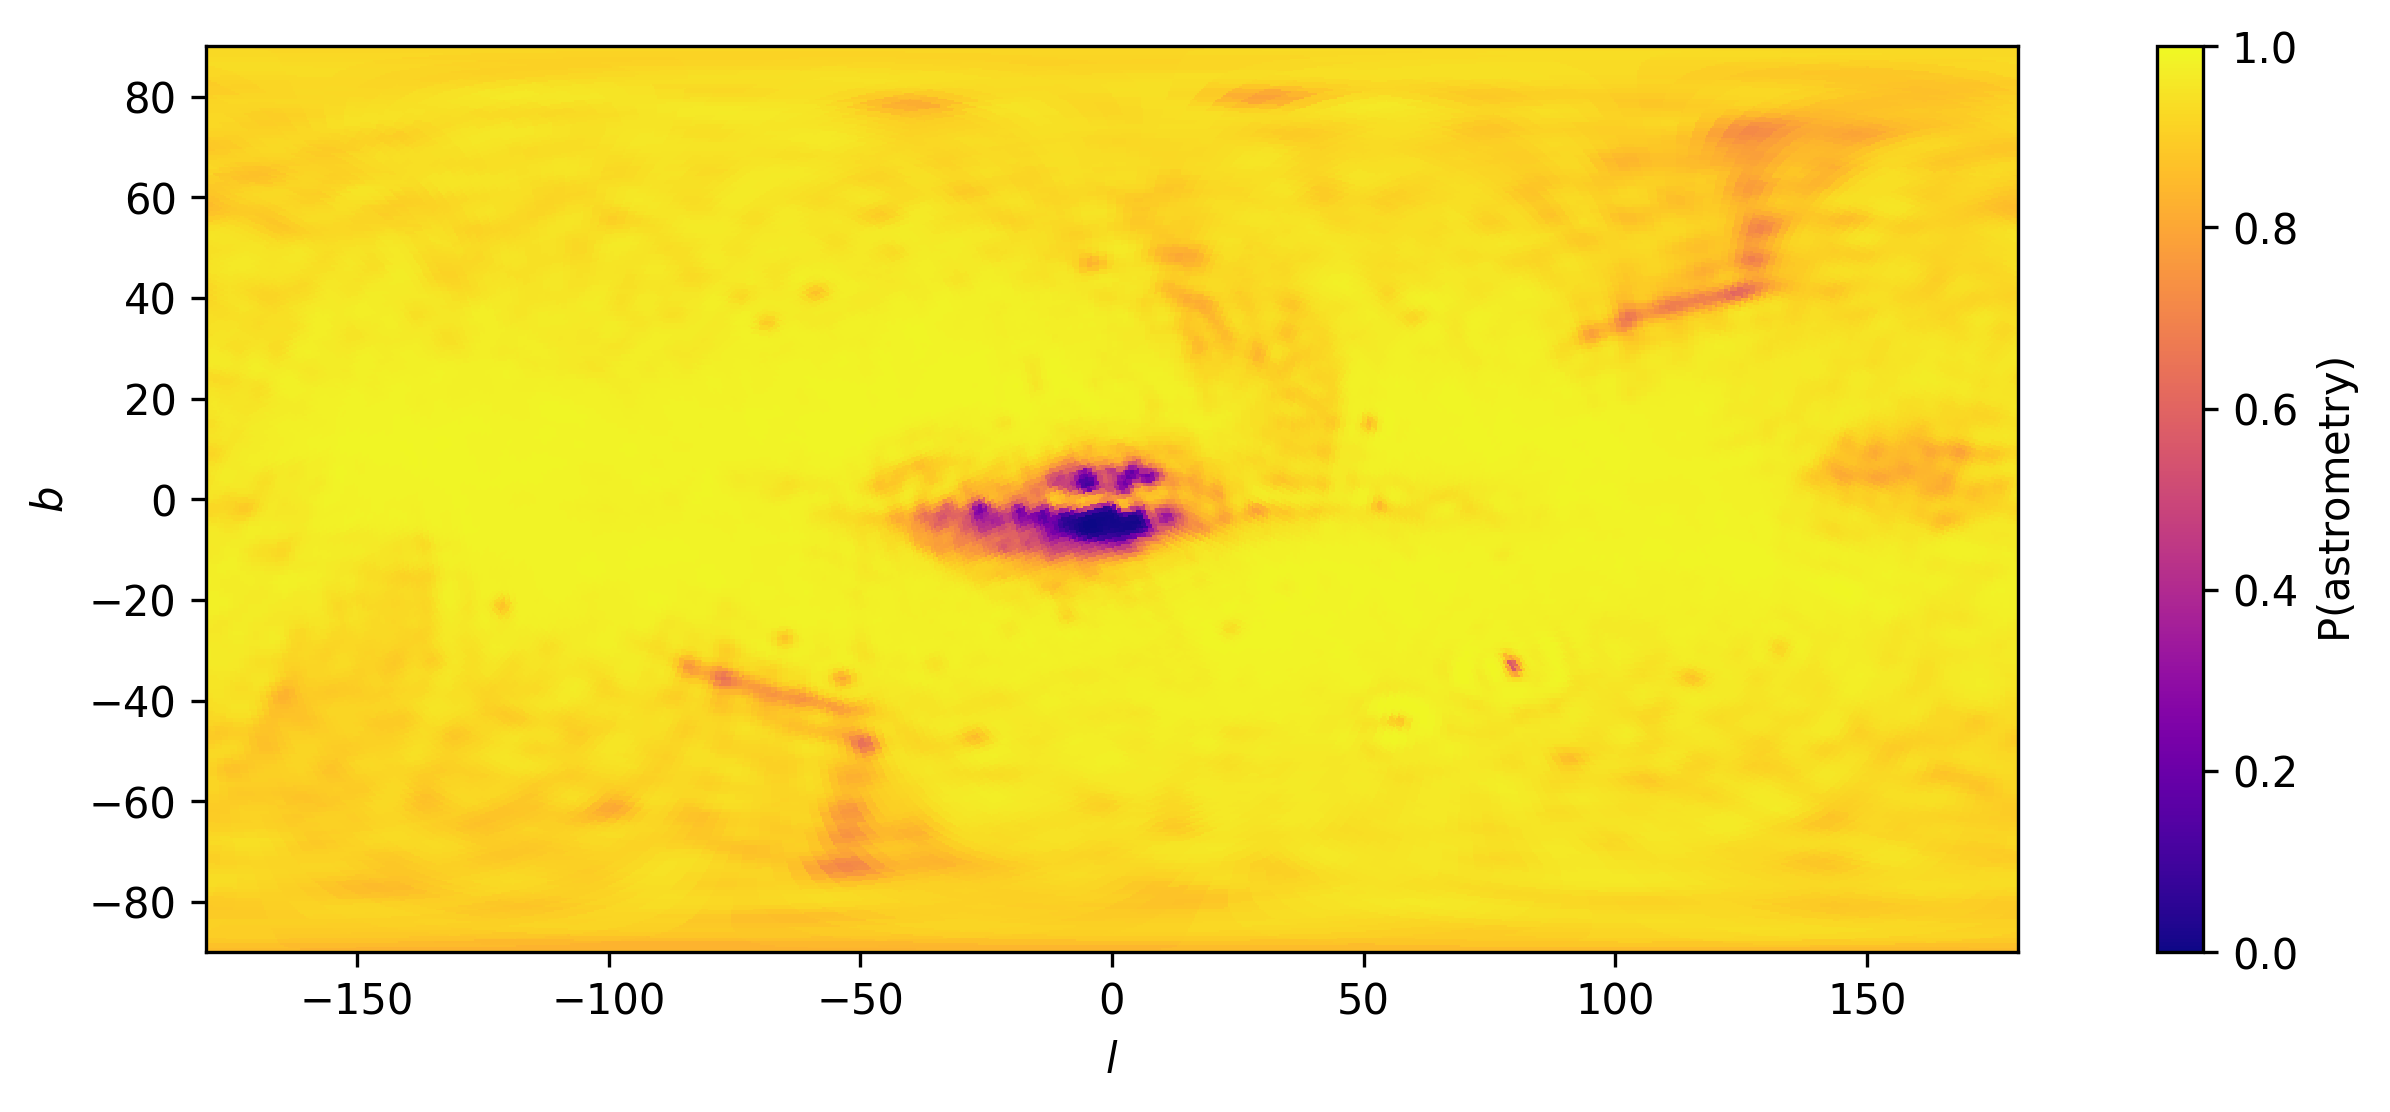

In [167]:
g = 20.55*np.ones(l.shape)
coords = Source(l*units.deg, b*units.deg, frame='galactic', photometry={'gaia_g':g})

prob_selection = ast_sf(coords, grid=True)*dr3_sf(coords)

fig = plt.figure(figsize=(12,4), dpi=150)

plt.imshow(
        prob_selection[::,::-1],
        vmin=0.,
        vmax=1.,
        origin='lower',
        interpolation='nearest',
        cmap='plasma',
        aspect='equal',
        extent=[-180,180,-90,90]
    )

plt.xlabel(r'$l$'); plt.ylabel(r'$b$')
cbar=plt.colorbar(); cbar.set_label(r'$\mathrm{P}(\mathrm{astrometry})$')

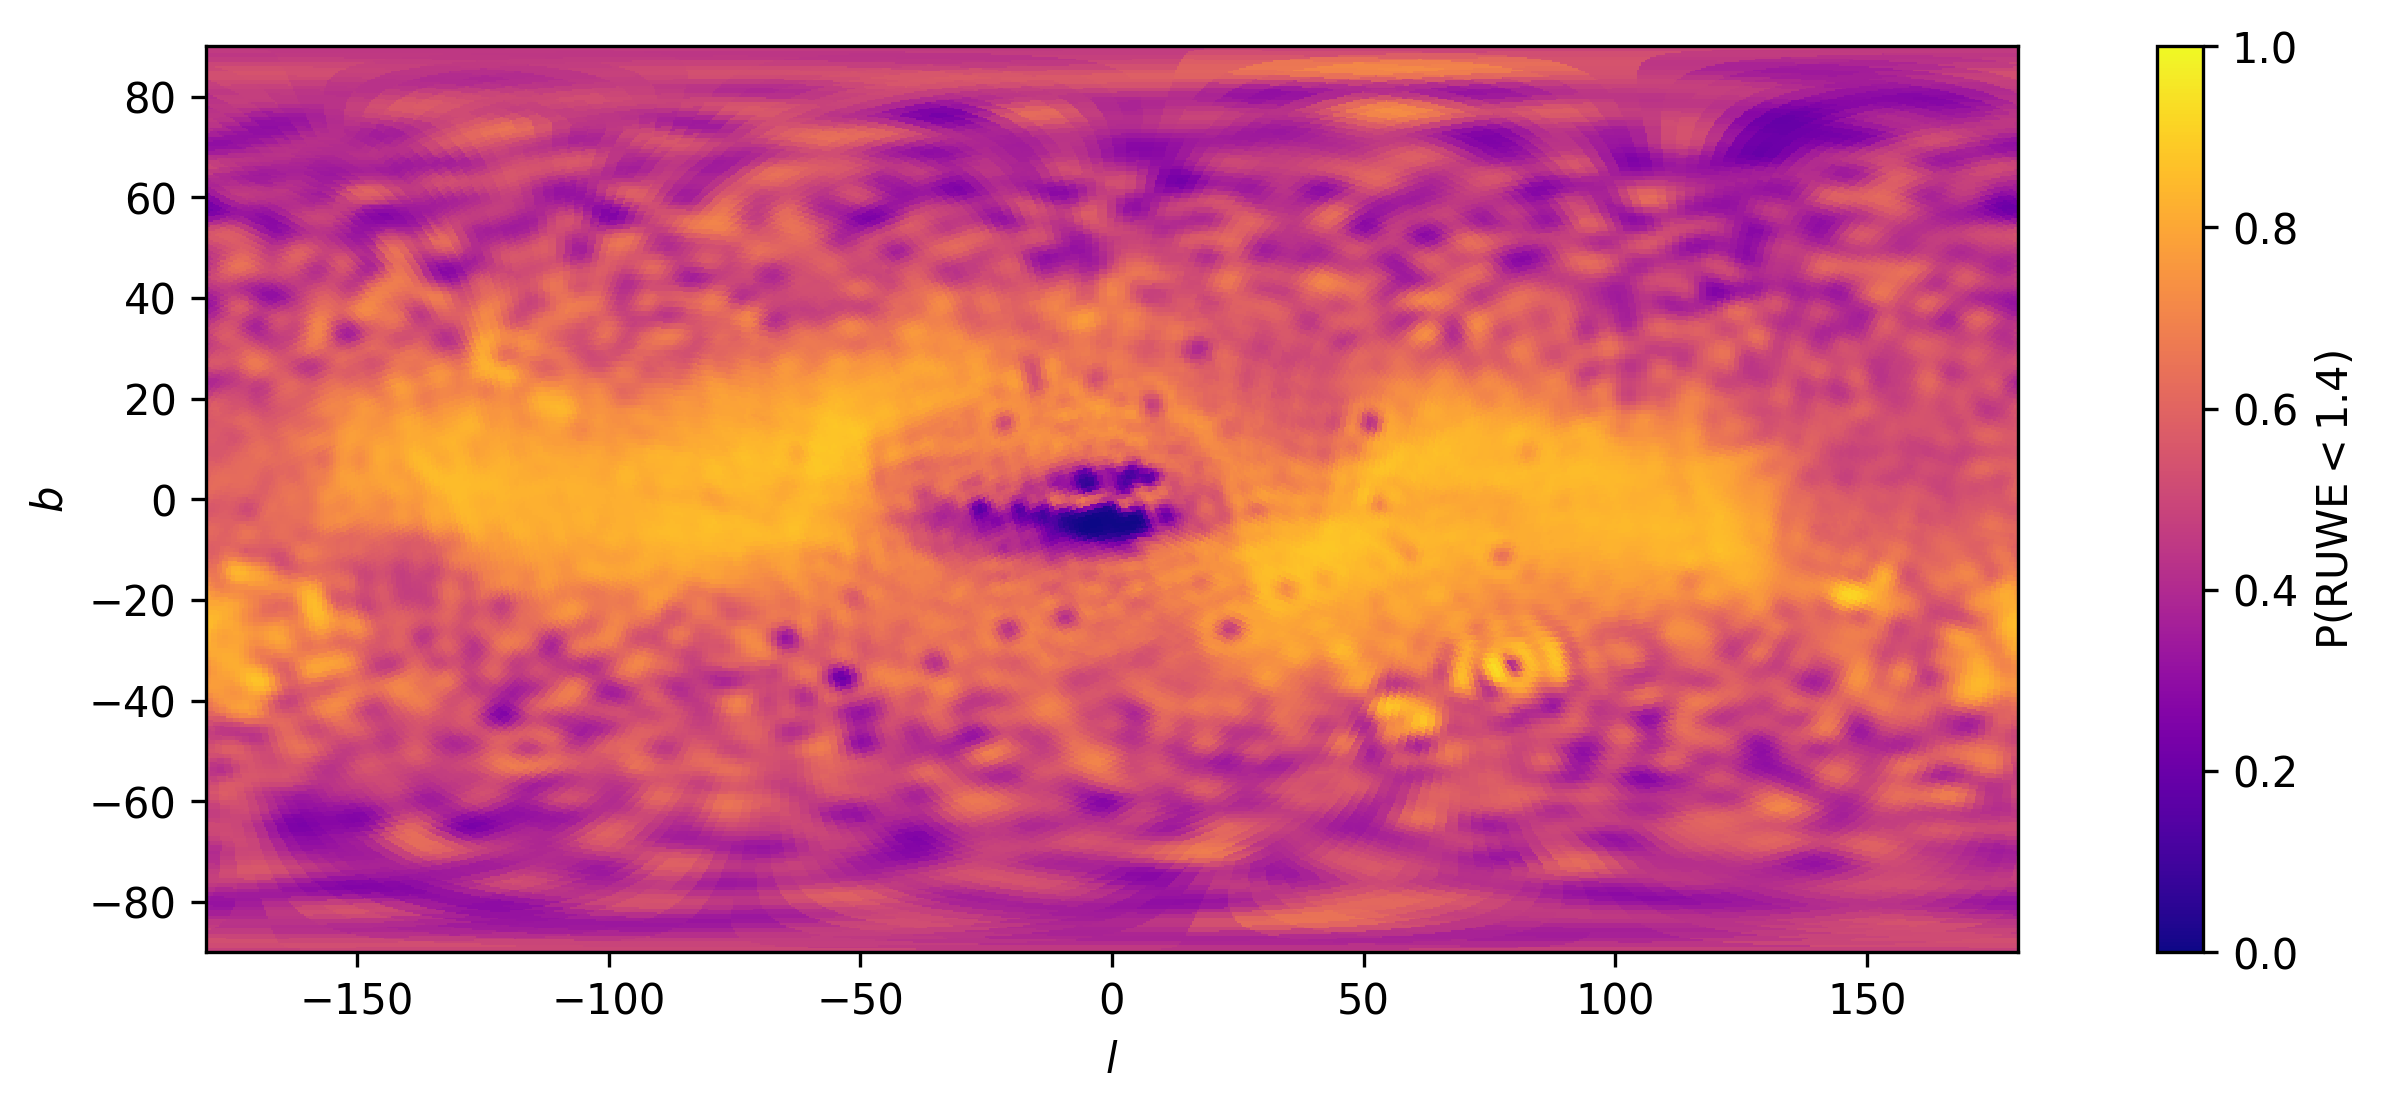

In [169]:
g = 20.55*np.ones(l.shape)
g_grp = 1.0*np.ones(l.shape)
coords = Source(l*units.deg, b*units.deg, frame='galactic', photometry={'gaia_g':g})#, 'gaia_g_gaia_rp':g_grp})

prob_selection = ruwe_sf(coords, grid=True)*dr3_sf(coords)

fig = plt.figure(figsize=(12,4), dpi=150)

plt.imshow(
        prob_selection[::,::-1],
        vmin=0.,
        vmax=1.,
        origin='lower',
        interpolation='nearest',
        cmap='plasma',
        aspect='equal',
        extent=[-180,180,-90,90]
    )

plt.xlabel(r'$l$'); plt.ylabel(r'$b$')
cbar=plt.colorbar(); cbar.set_label(r'$\mathrm{P}(\mathrm{RUWE}<1.4)$')

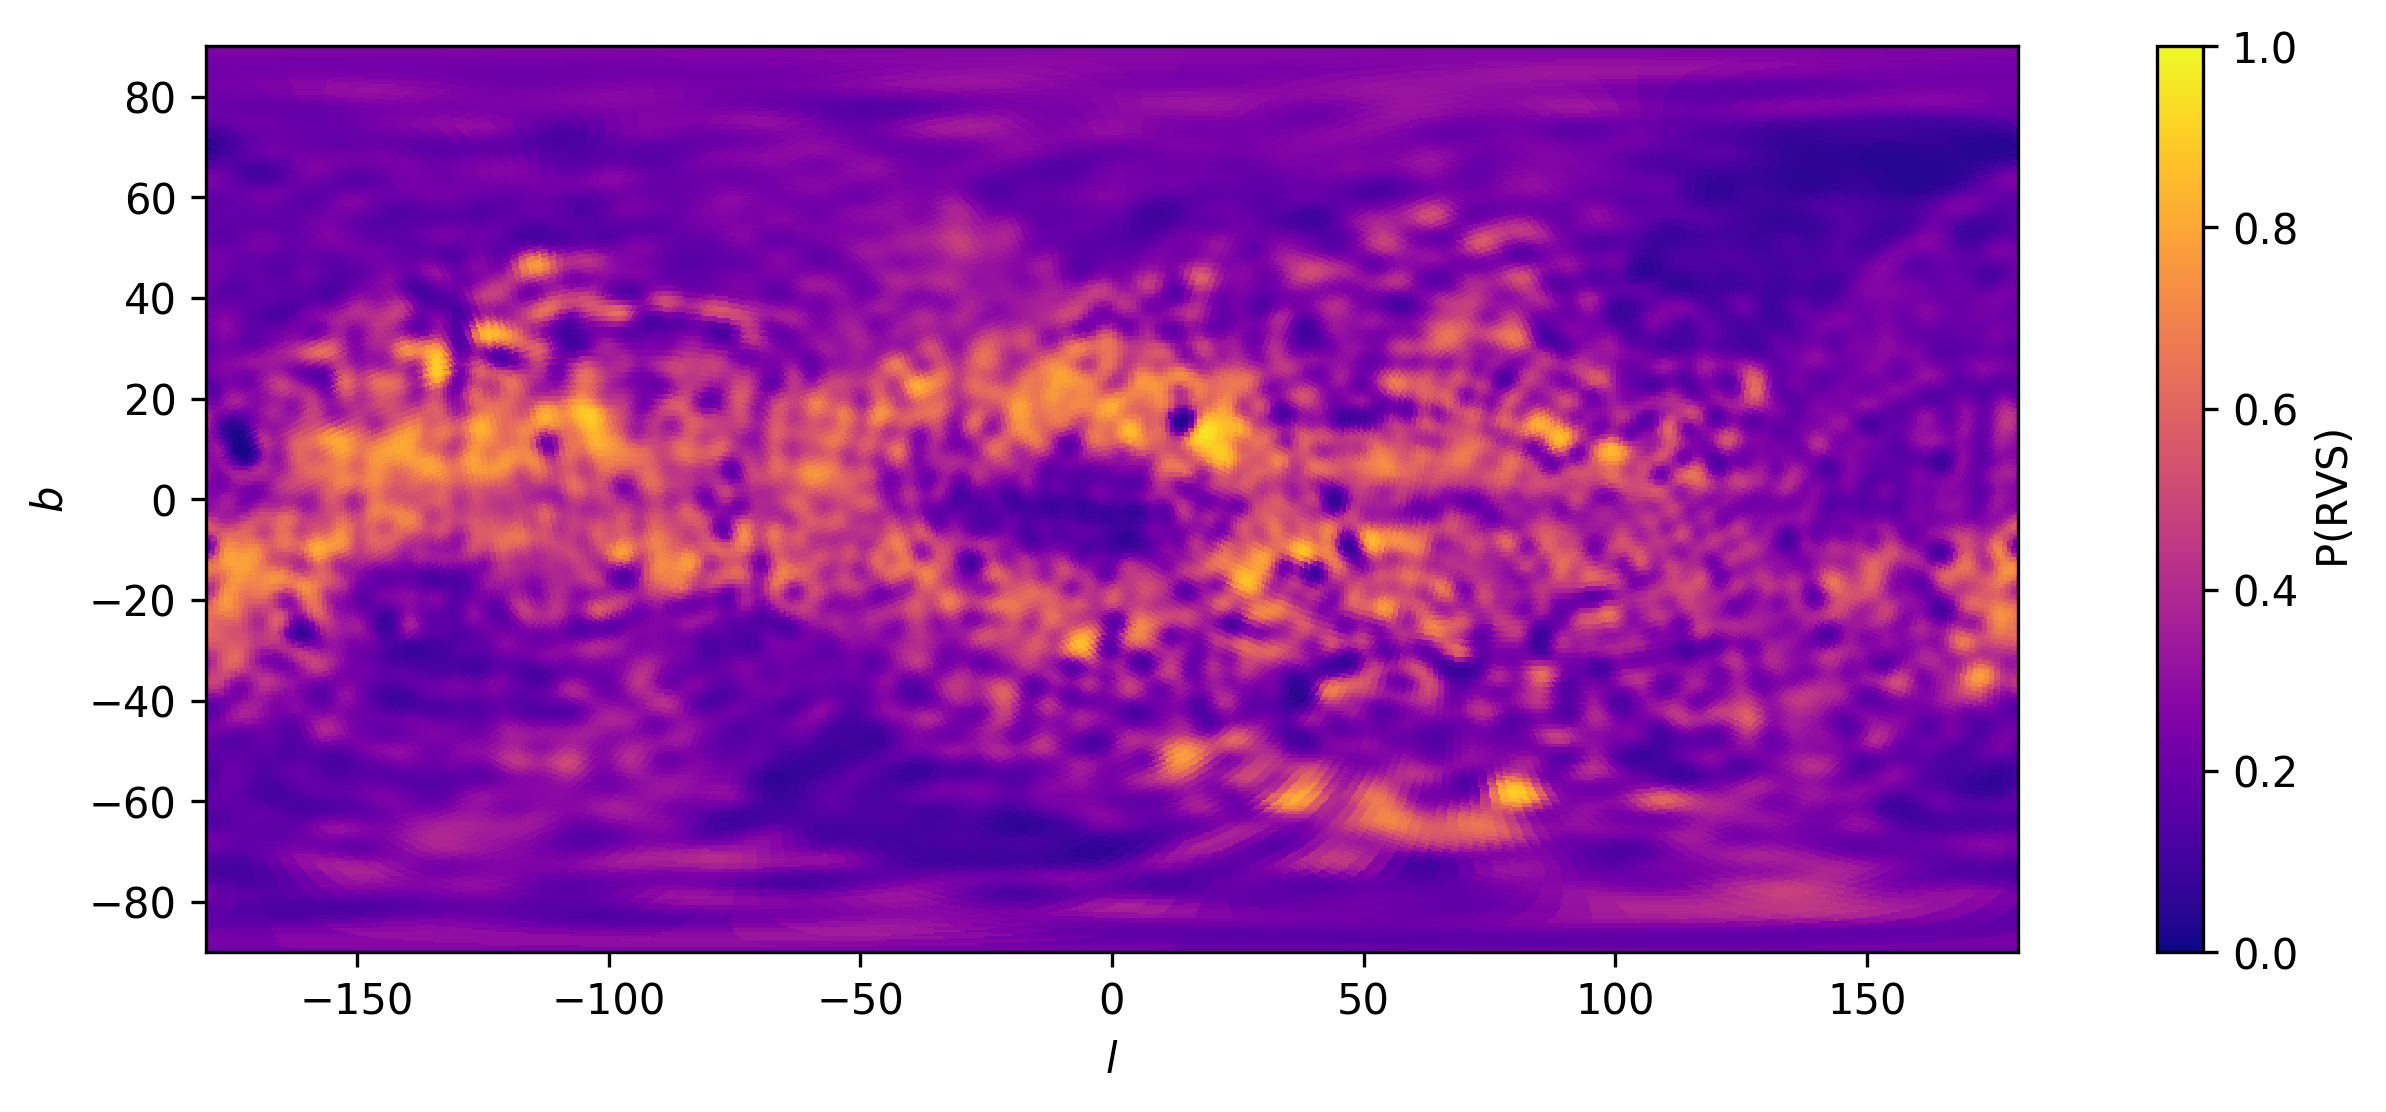

In [152]:
g = 13*np.ones(l.shape)
g_grp = 0.5*np.ones(l.shape)
coords = Source(l*units.deg, b*units.deg, frame='galactic', photometry={'gaia_g':g, 'gaia_g_gaia_rp':g_grp})

prob_selection = rvs_sf(coords, grid=True)*dr3_sf(coords)

fig = plt.figure(figsize=(12,4), dpi=150)

plt.imshow(
        prob_selection[::,::-1],
        vmin=0.,
        vmax=1.,
        origin='lower',
        interpolation='nearest',
        cmap='plasma',
        aspect='equal',
        extent=[-180,180,-90,90]
    )
plt.xlabel(r'$l$'); plt.ylabel(r'$b$')
cbar=plt.colorbar(); cbar.set_label(r'$\mathrm{P}(\mathrm{RVS})$')